In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os

In [5]:
cd /content/drive/MyDrive/plant-disease-detect/Training

/content/drive/MyDrive/plant-disease-detect/Training


In [6]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders
splitfolders.ratio('PlantVillage', output="dataset", ratio=(.7, .1, .2)) 

Copying files: 13581 files [05:16, 42.89 files/s] 


In [6]:
IMAGE_SIZE=256
CHANNELS=3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    'dataset2/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 10453 images belonging to 19 classes.


In [7]:
for image_batch, label_batch in train_generator:
  print(image_batch[0])
  break

[[[0.59595364 0.5371301  0.55673796]
  [0.5921569  0.53333336 0.5529412 ]
  [0.59332097 0.53449744 0.5541053 ]
  ...
  [0.68211514 0.6389779  0.6625073 ]
  [0.68229645 0.6391592  0.6626886 ]
  [0.68222815 0.6390909  0.6626203 ]]

 [[0.59624803 0.5374245  0.55703235]
  [0.5922176  0.5333941  0.55300194]
  [0.5921569  0.53333336 0.5529412 ]
  ...
  [0.67867345 0.6355362  0.6590656 ]
  [0.6784921  0.6353549  0.6588843 ]
  [0.6784314  0.63529414 0.65882355]]

 [[0.59679204 0.5379685  0.55757636]
  [0.59239894 0.5335754  0.55318326]
  [0.5921569  0.53333336 0.5529412 ]
  ...
  [0.6784314  0.63529414 0.65882355]
  [0.6784314  0.63529414 0.65882355]
  [0.6784314  0.63529414 0.65882355]]

 ...

 [[0.538419   0.4795955  0.49136025]
  [0.53764445 0.4788209  0.4905856 ]
  [0.5387324  0.47990888 0.4916736 ]
  ...
  [0.64118564 0.59020525 0.61765623]
  [0.66986215 0.61888176 0.64633274]
  [0.6638186  0.6128382  0.6402892 ]]

 [[0.56006074 0.5012372  0.5130019 ]
  [0.56054145 0.5017179  0.51348263]


In [8]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset2/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 1501 images belonging to 19 classes.


In [9]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = test_datagen.flow_from_directory(
    'dataset2/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse'
)

Found 3013 images belonging to 19 classes.


In [10]:
BATCH_SIZE=32
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 19

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
10453/32

326.65625

In [14]:
1501/32

46.90625

In [ ]:
model_version = max([int(i) for i in os.listdir("../models") +[0]])+1
model.save(f"../models/{model_version}")

In [ ]:
scores=model.evaluate(test_generator)

95/95 [==============================] - 711s 8s/step - loss: 0.2701 - accuracy: 0.9207


In [ ]:
scores

[0.2700580358505249, 0.9206770658493042]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 326}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

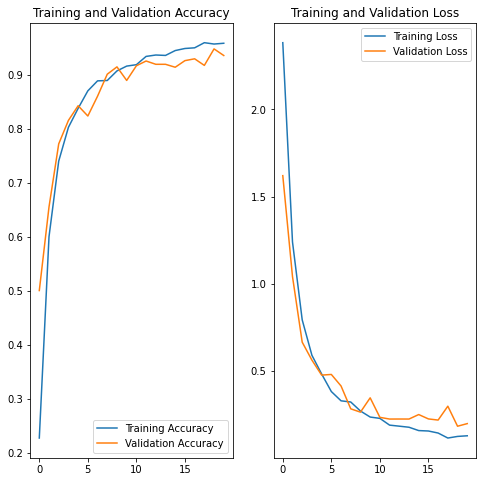

In [ ]:
EPOCHS=20

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___healthy': 2,
 'Grape___Black_rot': 3,
 'Grape___Esca_(Black_Measles)': 4,
 'Grape___healthy': 5,
 'Peach___Bacterial_spot': 6,
 'Peach___healthy': 7,
 'Pepper,_bell___Bacterial_spot': 8,
 'Pepper,_bell___healthy': 9,
 'Potato___Early_blight': 10,
 'Potato___Late_blight': 11,
 'Potato___healthy': 12,
 'Strawberry___Leaf_scorch': 13,
 'Strawberry___healthy': 14,
 'Tomato___Bacterial_spot': 15,
 'Tomato___Early_blight': 16,
 'Tomato___Late_blight': 17,
 'Tomato___healthy': 18}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___healthy']

first image to predict
first image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 41ms/step
Potato___Late_blight


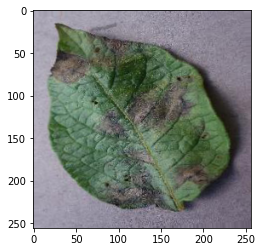

In [ ]:
import numpy as np
for images_batch, labels_batch in test_generator:
  first_image = images_batch[0]
  first_label = int(labels_batch[0])

  print('first image to predict')
  plt.imshow(first_image)
  print("first image's actual label:", class_names[first_label] )

  batch_prediction = model.predict(images_batch)
  print(class_names[np.argmax(batch_prediction[0])])

  break

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 30ms/step


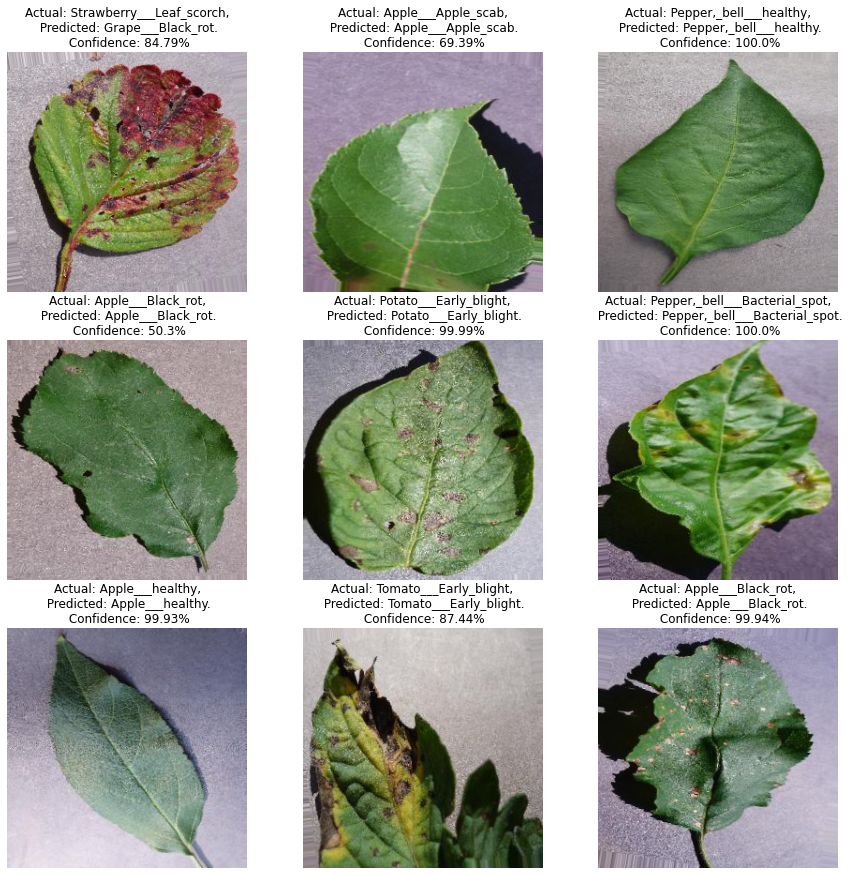

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
model.save("../potatoes.h5")